In [4]:
import pandas as pd
import matplotlib.pyplot
data = pd.read_csv('S02-hw-dataset.csv')
print("head:")
print(data.head())
print("info:")
data.info()
print("decribe:")
data.describe()

head:
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
decribe:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [26]:
#проверим пропущеные значения и дубликаты, а также подозрительные случаи
missing_percent = data.isna().mean()
print('Процент пропущенных занчений:')
print(missing_percent)
print(data[data.isna().any(axis=1)])

dublicated_rows = data[data.duplicated(keep=False)]
print('\nВсе дублирующиеся строки:')
print(dublicated_rows)

print('\nПодозрительные случаи:')
sus_age = data[(data['age']>100) | (data['age']<1)]
if len(sus_age)>0:
    print(sus_age)
sus_revenue = data[(data['purchases']>0) & (data['revenue']<=0)]
if len(sus_revenue)>0:
    print(sus_revenue)
sus_purchases = data[(data['purchases']<0)| (data['revenue']<0)]
if(len(sus_purchases)>0):
    print(sus_purchases)

Процент пропущенных занчений:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
    user_id  age country  purchases  revenue
4         5  NaN      DE          6     1296
12       13  NaN      US          9      630

Все дублирующиеся строки:
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511

Подозрительные случаи:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


Были обнаружены проблемы пустых значений, отрицательных значений покупок, дублирующихся строк, невозможных значений возраста и невозможных соотношений прибыли и покупок(покуаки есть, а прибыль 0).

In [ ]:
#очищаем данные
edited_data = data.drop_duplicates()
edited_data = edited_data[
    (edited_data['age'] >= 1) & (edited_data['age'] <= 100) &  # нормальный возраст
    ~((edited_data['purchases'] > 0) & (edited_data['revenue'] <= 0)) &  # нет логических противоречий
    (edited_data['purchases'] >= 0)  # нет отрицательных покупок
]
print("частота по стране")
print(edited_data['country'].value_counts())

print("\nгруппировка по стране")
grouped = edited_data.groupby('country').agg({
    'user_id': 'count',
    'age': 'mean',
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
}).round(2)
print(grouped)

print("\nвозрастные группы")
edited_data['age_group'] = pd.cut(edited_data['age'], 
                          bins=[0, 25, 35, 45, 100], 
                          labels=['до 25', '26-35', '36-45', '46+'])

age_analysis = edited_data.groupby('age_group').agg({
    'user_id': 'count',
    'purchases': 'mean',
    'revenue': 'mean'
}).round(2)
print(age_analysis)

очищаем данные
частота по стране
country
RU    12
FR    11
US     6
DE     5
CN     2
Name: count, dtype: int64

группировка по стране
        user_id    age purchases      revenue      
          count   mean      mean sum     mean   sum
country                                            
CN            2  24.00      4.50   9  1054.00  2108
DE            5  34.60      6.60  33  1475.40  7377
FR           11  39.55      4.73  52   666.00  7326
RU           12  30.58      4.58  55   813.33  9760
US            6  38.83      4.00  24   638.17  3829

возрастные группы
           user_id  purchases  revenue
age_group                             
до 25           10       5.10   789.70
26-35           11       4.91   946.82
36-45            6       4.83  1106.00
46+              9       4.33   605.78


C:\Users\korobochka_sahara\AppData\Local\Temp\ipykernel_29412\3063454628.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = edited_data.groupby('age_group').agg({


Доминируют пользователи из России и Франции, при этом немецкие пользователи показывают самую высокую среднюю выручку (1475.4). 
Наблюдается нелинейная зависимость выручки от возраста: пик приходится на группу 36-45 лет (1106.0), тогда у пользователей 46+ лет выручка снижается почти вдвое

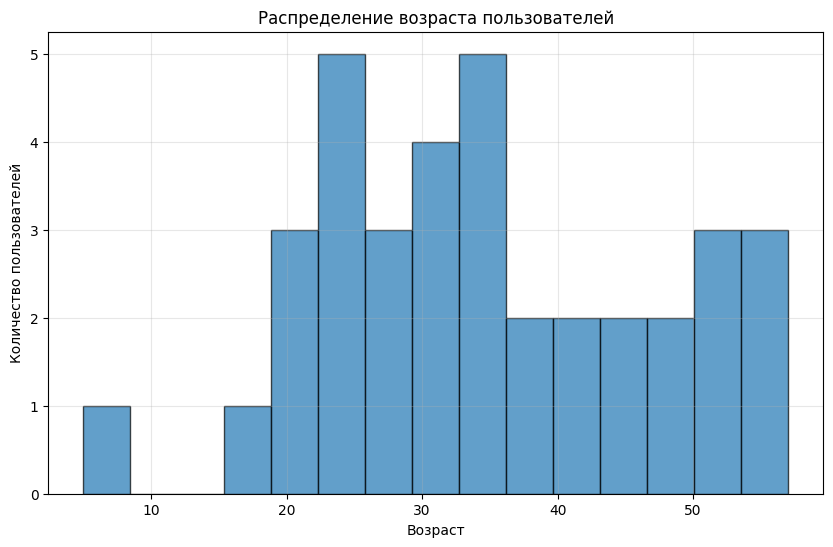

Большинство пользователей сосредоточены в диапазоне 25-35 лет.


<Figure size 1200x600 with 0 Axes>

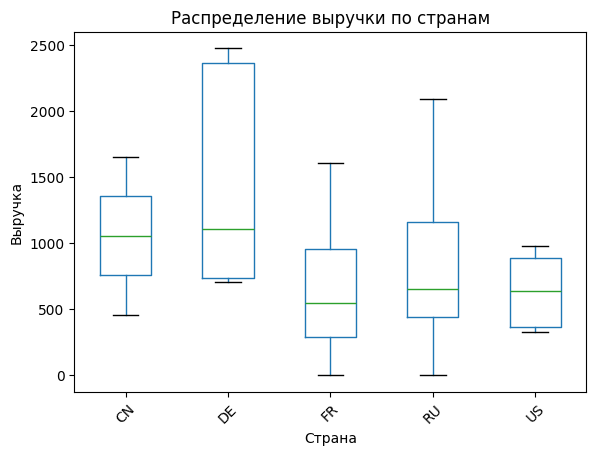

Германия показывает самые высокие медианные значения выручки.


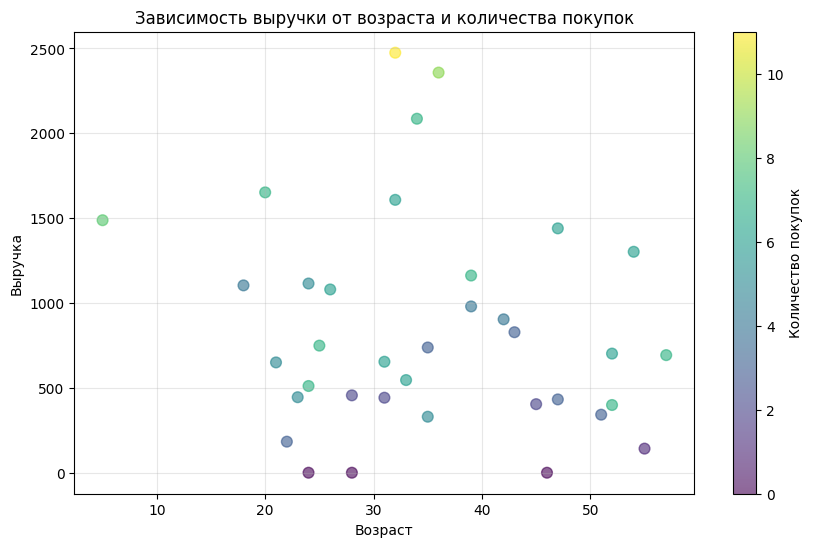

Наблюдается параболическая кривая - чем ближе возраст к среднему, тем больше выручка и количество покупок


In [36]:
import matplotlib.pyplot as plt
import os
#графики
#гистограмма распределения возраста показывает распределение пользователей по возрастным группам
plt.figure(figsize=(10, 6))
plt.hist(edited_data['age'], bins=15, alpha=0.7, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')
plt.grid(True, alpha=0.3)
plt.savefig('figures/age_histogram.png', dpi=300, bbox_inches='tight')
plt.show()
print("Большинство пользователей сосредоточены в диапазоне 25-35 лет.")
#боксплот демонстрирует различия в распределении выручки между странами
plt.figure(figsize=(12, 6))
edited_data.boxplot(column='revenue', by='country', grid=False)
plt.title('Распределение выручки по странам')
plt.suptitle('')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.savefig('figures/revenue_by_country_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("Германия показывает самые высокие медианные значения выручки.")
#диаграмма рассеяния показывает связь между возрастом и выручкой
plt.figure(figsize=(10, 6))
scatter = plt.scatter(edited_data['age'], edited_data['revenue'], c=edited_data['purchases'], 
                     cmap='viridis', alpha=0.6, s=60)
plt.colorbar(scatter, label='Количество покупок')
plt.xlabel('Возраст')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от возраста и количества покупок')
plt.grid(True, alpha=0.3)
plt.savefig('figures/age_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
print("Наблюдается параболическая кривая - чем ближе возраст к среднему, тем больше выручка и количество покупок")
